In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
from datetime import timedelta

In [2]:
# sheet_a = '1qZoeopni41JxnTg4O7R0yGP2qOONi812_gLu7rFGVTE'
# order_payments_dataset_existing = pd.read_csv (f"https://docs.google.com/spreadsheets/d/{sheet_a}/export?format=csv")
# order_payments_dataset = order_payments_dataset_existing.copy()
# order_payments_dataset.head()

# IMPORTING DATASETS

In [3]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1QdGaenZCpROORr-drLV8_HBOCCXoomggxa7zI8W7Z8I/edit#gid=1083798705'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
customer_dataset = pd.read_csv(sheet_url_trf)
customer_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
sheet_url2 = 'https://docs.google.com/spreadsheets/d/1qZoeopni41JxnTg4O7R0yGP2qOONi812_gLu7rFGVTE/edit#gid=140183033'
sheet_url2_trf = sheet_url2.replace('/edit#gid=', '/export?format=csv&gid=')
order_payments_dataset = pd.read_csv(sheet_url2_trf)
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
sheet_url3 = 'https://docs.google.com/spreadsheets/d/14QoQFzrm-eXFG5b2OG3VpfIhg1zFgLJ4YCi3PrG1CB4/edit#gid=1933464185'
sheet_url3_trf = sheet_url3.replace('/edit#gid=', '/export?format=csv&gid=')
order_dataset = pd.read_csv(sheet_url3_trf)
order_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


# 1A Removing Irrelevant Values

In [6]:

CDS = customer_dataset.copy()
CDS = CDS.drop(columns = ['customer_unique_id','customer_zip_code_prefix','customer_city'])
CDS

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP
...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,CE
99439,56b18e2166679b8a959d72dd06da27f9,RS


In [7]:
OPDT = order_payments_dataset.copy()
OPDT = OPDT.drop(columns =['payment_sequential','payment_installments'])
OPDT

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,363.31
103882,7b905861d7c825891d6347454ea7863f,credit_card,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,47.77
103884,b8b61059626efa996a60be9bb9320e10,credit_card,369.54


In [8]:
ODS = order_dataset.copy()
ODS = ODS.drop(columns = ['order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
ODS

,order_id,customer_id,order_status,order_approved_at
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 3:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:37
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:16
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:21


#1F. COMBINING DATASET

In [9]:
Main1 = ODS.merge(OPDT, how= 'left')
Main1

,order_id,customer_id,order_status,order_approved_at,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 3:24:27,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:55:23,credit_card,179.12
...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,credit_card,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:37,credit_card,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:16,credit_card,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:21,credit_card,441.16


In [10]:
Main2 = Main1.merge(CDS, how= 'left')
Main2

,order_id,customer_id,order_status,order_approved_at,payment_type,payment_value,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,credit_card,18.12,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,voucher,2.00,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,voucher,18.59,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 3:24:27,boleto,141.46,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:55:23,credit_card,179.12,GO
...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,credit_card,85.08,SP
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:37,credit_card,195.00,SP
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:16,credit_card,271.01,BA
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:21,credit_card,441.16,RJ


#1B. Handling Missing Values

In [11]:
Main2.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_approved_at,175
payment_type,1
payment_value,1
customer_state,0


In [12]:
dropped_main2 = Main2.copy()
dropped_main2.dropna(axis=0, inplace=True)
dropped_main2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103711 entries, 0 to 103886
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           103711 non-null  object 
 1   customer_id        103711 non-null  object 
 2   order_status       103711 non-null  object 
 3   order_approved_at  103711 non-null  object 
 4   payment_type       103711 non-null  object 
 5   payment_value      103711 non-null  float64
 6   customer_state     103711 non-null  object 
dtypes: float64(1), object(6)
memory usage: 6.3+ MB


#1C. Removing Duplicate Values

In [13]:
dropped_main2_dup = dropped_main2.copy()
dropped_main2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103711 entries, 0 to 103886
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           103711 non-null  object 
 1   customer_id        103711 non-null  object 
 2   order_status       103711 non-null  object 
 3   order_approved_at  103711 non-null  object 
 4   payment_type       103711 non-null  object 
 5   payment_value      103711 non-null  float64
 6   customer_state     103711 non-null  object 
dtypes: float64(1), object(6)
memory usage: 6.3+ MB


In [14]:
# To show there are duplicate values
dropped_main2[dropped_main2['order_id'].duplicated()]

,order_id,customer_id,order_status,order_approved_at,payment_type,payment_value,customer_state
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,voucher,2.00,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,voucher,18.59,SP
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 12:05:32,credit_card,8.34,SP
23,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 16:08:14,voucher,24.86,BA
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 16:08:14,credit_card,5.96,BA
...,...,...,...,...,...,...,...
103774,0572c996d9b4a7645bb071a158a64bbb,874b661d62c1e74aafa401942f9d94cb,delivered,2017-11-20 22:07:27,credit_card,42.59,RJ
103783,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 15:09:52,voucher,49.32,PA
103784,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 15:09:52,voucher,8.13,PA
103878,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 20:07:14,voucher,64.37,MT


In [15]:
#Removing Duplicate Values
dropped_main2_dup = dropped_main2_dup.drop_duplicates(['order_id'])

In [16]:
#Removed Duplicate Result
dropped_main2_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99280 entries, 0 to 103886
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           99280 non-null  object 
 1   customer_id        99280 non-null  object 
 2   order_status       99280 non-null  object 
 3   order_approved_at  99280 non-null  object 
 4   payment_type       99280 non-null  object 
 5   payment_value      99280 non-null  float64
 6   customer_state     99280 non-null  object 
dtypes: float64(1), object(6)
memory usage: 6.1+ MB


#1D. Handling Outliers

In [17]:
dropped_main2_dup.describe()

,payment_value
count,99280.000000
mean,158.219035
std,219.012258
min,0.010000
25%,60.010000
50%,103.300000
75%,175.092500
max,13664.080000


In [18]:
Q1 = dropped_main2_dup['payment_value'].quantile(0.25)
Q3 = dropped_main2_dup['payment_value'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

In [19]:
filter_price_min = dropped_main2_dup['payment_value']<boxplot_min
filter_price_max = dropped_main2_dup['payment_value']>boxplot_max

main2_nonout = dropped_main2_dup[~(filter_price_min|filter_price_max)]
main2_nonout

,order_id,customer_id,order_status,order_approved_at,payment_type,payment_value,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,credit_card,18.12,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 3:24:27,boleto,141.46,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:55:23,credit_card,179.12,GO
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,credit_card,72.20,RN
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,credit_card,28.62,SP
...,...,...,...,...,...,...,...
103881,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 9:15:11,credit_card,155.99,SP
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,credit_card,85.08,SP
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:37,credit_card,195.00,SP
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:16,credit_card,271.01,BA


#1E. Converting Data Types

In [20]:
main2_nonout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91530 entries, 0 to 103886
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           91530 non-null  object 
 1   customer_id        91530 non-null  object 
 2   order_status       91530 non-null  object 
 3   order_approved_at  91530 non-null  object 
 4   payment_type       91530 non-null  object 
 5   payment_value      91530 non-null  float64
 6   customer_state     91530 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.6+ MB


In [21]:
HEHEHE = main2_nonout.copy()
HEHEHE['order_approved_at'] = HEHEHE['order_approved_at'].astype('datetime64[ns]')
HEHEHE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91530 entries, 0 to 103886
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           91530 non-null  object        
 1   customer_id        91530 non-null  object        
 2   order_status       91530 non-null  object        
 3   order_approved_at  91530 non-null  datetime64[ns]
 4   payment_type       91530 non-null  object        
 5   payment_value      91530 non-null  float64       
 6   customer_state     91530 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 7.6+ MB


In [22]:
#No Typos in three datasets (mainly order id and customers id are all random generated numbers)
HEHEHE['payment_type'].value_counts()

,count
payment_type,
credit_card,68986
boleto,18486
voucher,2615
debit_card,1443


#2A. Evaluate Descriptive Statistics

In [23]:
EDA = HEHEHE['payment_value'].copy()
Result = round(EDA.describe(),3)
Result['Mode'] = stats.mode(EDA)
Result['Range'] = EDA.max() - EDA.min()
Result['Variance'] = EDA.var()
Result['CoV'] = stats.variation(EDA, axis = 0)
Result['Skew'] = EDA.skew()
Result['Kurt'] = EDA.kurt()
Result



,payment_value
count,91530.0
mean,113.404
std,72.606
min,0.01
25%,57.1
50%,95.37
75%,154.1
max,347.7
Mode,"(77.57, 250)"
Range,347.69


<Axes: xlabel='payment_value', ylabel='Count'>

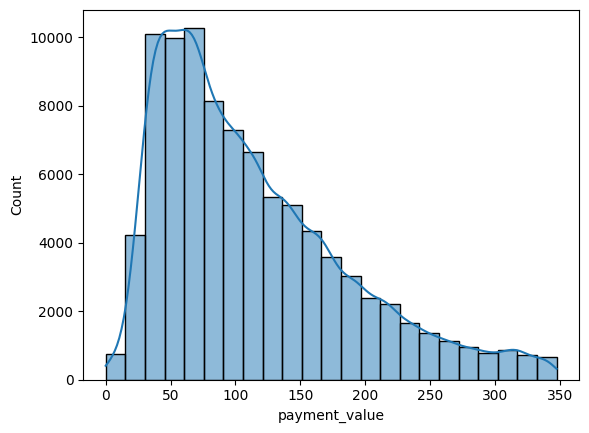

In [24]:
sns.histplot(data=HEHEHE, x='payment_value', binwidth=15, kde=True)

INSIGHT

From the data and the graphic above, we can conclude that the data is slightly positive or right skewed because the mean is greater than median. the data is Bimodal because there are 2 modes, 77.57 and 250. and it is platykurtic (kurtosis < 3). And the average payment value is $113.404.

#2B. Data Visualization

In [25]:
order_per_month = HEHEHE.copy()
order_per_month['month'] = order_per_month['order_approved_at'].dt.strftime('%m')
order_per_month['month_name'] = order_per_month['order_approved_at'].dt.strftime('%b')
order_per_month['year'] = order_per_month['order_approved_at'].dt.strftime('%Y')
order_per_month.head()

,order_id,customer_id,order_status,order_approved_at,payment_type,payment_value,customer_state,month,month_name,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,credit_card,18.12,SP,10,Oct,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,boleto,141.46,BA,07,Jul,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,credit_card,179.12,GO,08,Aug,2018
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,credit_card,72.20,RN,11,Nov,2017
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,credit_card,28.62,SP,02,Feb,2018


In [26]:
Viz = order_per_month.groupby(['year', 'month'])['order_id'].count()
Viz = pd.DataFrame(Viz)
Viz

order_id
year month          
2016 10          281
     12            1
2017 01          672
     02         1615
     03         2467
     04         2171
     05         3398
     06         3015
     07         3711
     08         4027
     09         3929
     10         4200
     11         6809
     12         5422
2018 01         6684
     02         6263
     03         6702
     04         6223
     05         6487
     06         5647
     07         5663
     08         6142
     09            1

In [27]:
Viz2 = Viz.copy()
Viz2.reset_index(inplace=True)
Viz2 = Viz2.drop([Viz2.index[1],Viz2.index[22]])
Viz2['year_month'] = Viz2['month']+"-"+Viz2['year']
Viz2

,year,month,order_id,year_month
0,2016,10,281,10-2016
2,2017,01,672,01-2017
3,2017,02,1615,02-2017
4,2017,03,2467,03-2017
5,2017,04,2171,04-2017
6,2017,05,3398,05-2017
7,2017,06,3015,06-2017
8,2017,07,3711,07-2017
9,2017,08,4027,08-2017
10,2017,09,3929,09-2017


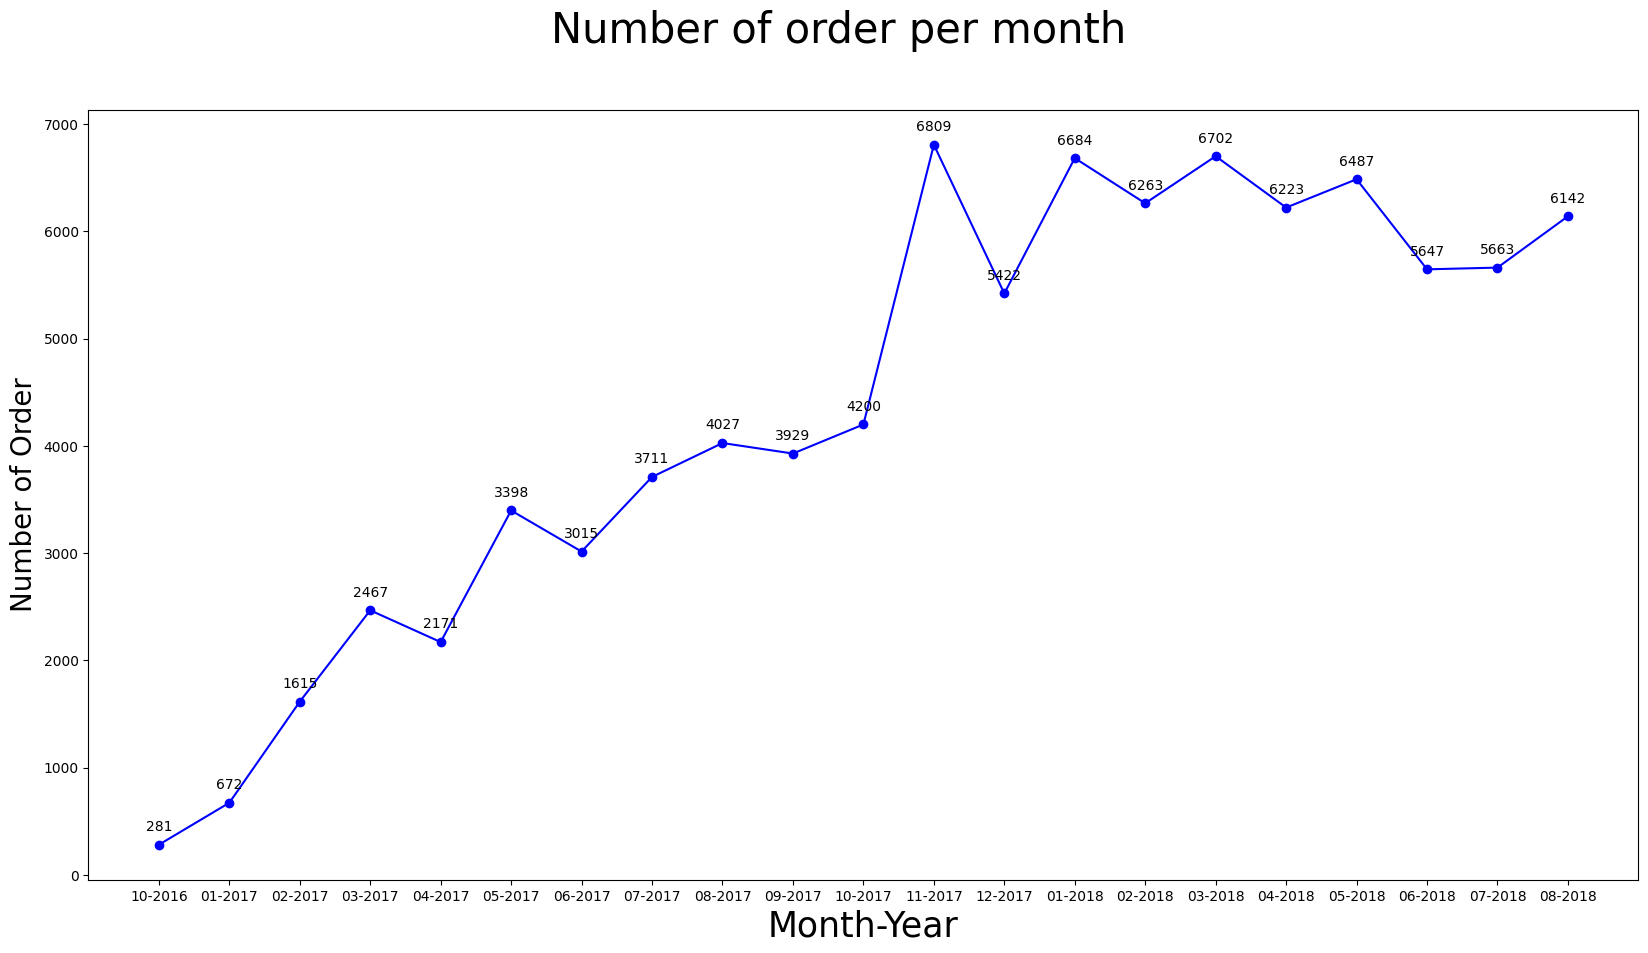

In [28]:
fig = plt.figure(figsize=(20, 10))

fig.suptitle('Number of order per month', fontsize=30)
plt.xlabel('Month-Year', fontsize=25)
plt.ylabel('Number of Order', fontsize=20)

x = Viz2['year_month']
y = Viz2['order_id']

plt.plot(x,y,'bo-')

for x,y in zip(x,y):

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')


**INSIGHT**

From the graph above there are steady increase in order from 10-2016 to 10-2017, but there is a significant spike in 11-2017, where the number of orders increase by 62%. Followed a slight drop off in the next month, the number rise up again and stay relatively simillar from 1-2018 to 5-2018, and the number drop off for two months, and then rise up again on 8-2018

In [29]:
daily_order = HEHEHE.copy()
daily_order['order_day'] = daily_order['order_approved_at'].dt.strftime("%A")
daily_order['date'] = daily_order['order_approved_at'].dt.strftime("%Y-%m-%d")
daily_order.head()

,order_id,customer_id,order_status,order_approved_at,payment_type,payment_value,customer_state,order_day,date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,credit_card,18.12,SP,Monday,2017-10-02
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,boleto,141.46,BA,Thursday,2018-07-26
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,credit_card,179.12,GO,Wednesday,2018-08-08
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,credit_card,72.20,RN,Saturday,2017-11-18
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,credit_card,28.62,SP,Tuesday,2018-02-13


In [30]:
daily_order['date'] = pd.to_datetime(daily_order['date'])

In [31]:
Viz3 = daily_order.groupby(['date'])['order_id'].count()
Viz3 = pd.DataFrame(Viz3)
Viz3.reset_index(inplace=True)
Viz3.head()

,date,order_id
0,2016-10-04,19
1,2016-10-05,8
2,2016-10-06,99
3,2016-10-07,49
4,2016-10-08,21


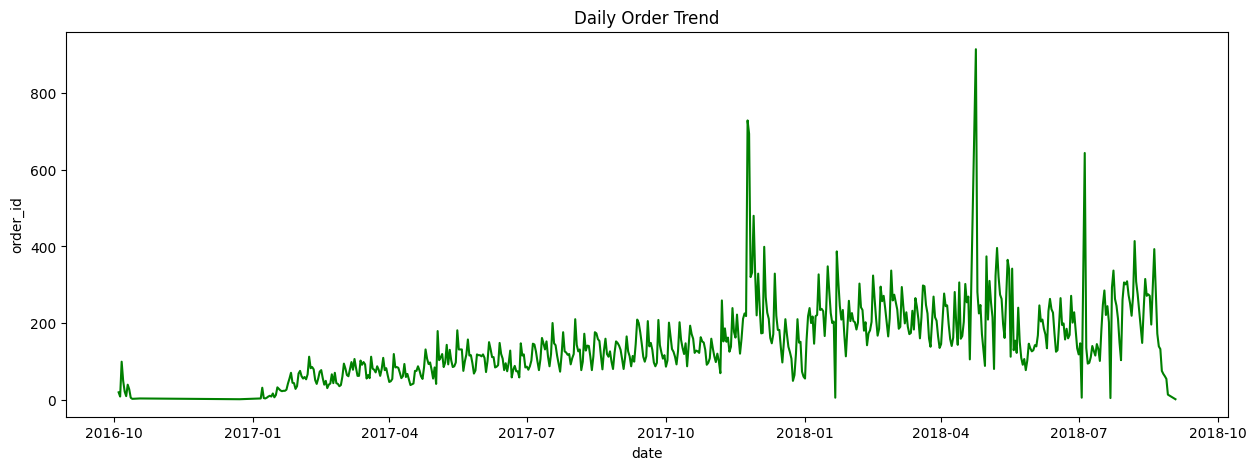

In [32]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Daily Order Trend')

sns.lineplot(data=Viz3, x='date', y='order_id', ax=ax, color='green')
plt.show()

INSIGHT

From the daily order trend above, the graph shows that the daily order trend are generally stable and rising steadily but there are also 2 interesting significant spikes on the week between 2017-10 and 2018-01 and also on the week of 2018-04 and 2018-07.

In [33]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
days = pd.DataFrame({'Days': cats})
days['Days'] = pd.Categorical(days['Days'], categories=cats, ordered=True)
days1 = days['Days'].copy()
days1

,Days
0,Monday
1,Tuesday
2,Wednesday
3,Thursday
4,Friday
5,Saturday
6,Sunday


In [34]:
Viz4 = daily_order.groupby(['order_day'])['order_id'].count().reindex(days1)
Viz4 = pd.DataFrame(Viz4)
Viz4.reset_index(inplace=True)
Viz4.columns = ['Day', 'Number of Order']
Viz4

,Day,Number of Order
0,Monday,11940
1,Tuesday,17777
2,Wednesday,14545
3,Thursday,14256
4,Friday,13458
5,Saturday,11198
6,Sunday,8356


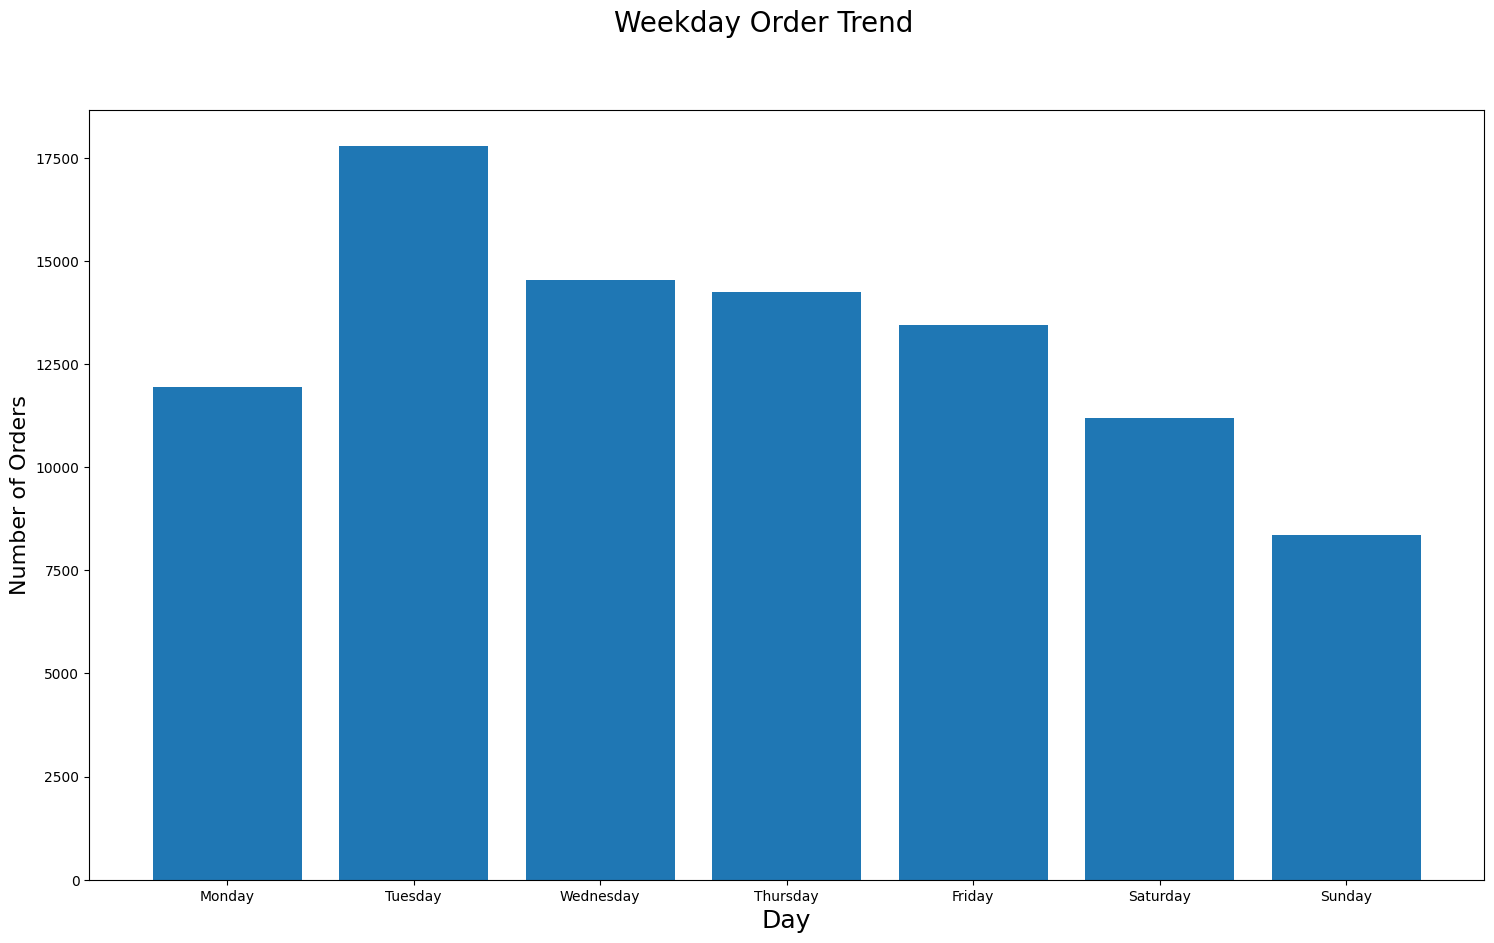

In [35]:
fig = plt.figure(figsize=(18, 10))

fig.suptitle('Weekday Order Trend', fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of Orders', fontsize=16)

x = Viz4['Day']
y = Viz4['Number of Order']
plt.bar(x, y)
plt.show()

INSIGHT

From the graphic above, we can conclude that the busiest day of the week is Tuesday and gradually decreasing until sunday and then rise up again on monday.

In [36]:
Viz5 = daily_order.groupby(['payment_type'])['order_id'].count()
Viz5

,order_id
payment_type,
boleto,18486
credit_card,68986
debit_card,1443
voucher,2615


In [37]:
Viz5 = pd.DataFrame(Viz5)
Viz5.reset_index(inplace=True)
Viz5

,payment_type,order_id
0,boleto,18486
1,credit_card,68986
2,debit_card,1443
3,voucher,2615


In [38]:
Viz6 = Viz5.copy()
Viz6['Percentage'] = (Viz6['order_id']/Viz6['order_id'].sum()) * 100
Viz6

,payment_type,order_id,Percentage
0,boleto,18486,20.196657
1,credit_card,68986,75.369824
2,debit_card,1443,1.576532
3,voucher,2615,2.856987


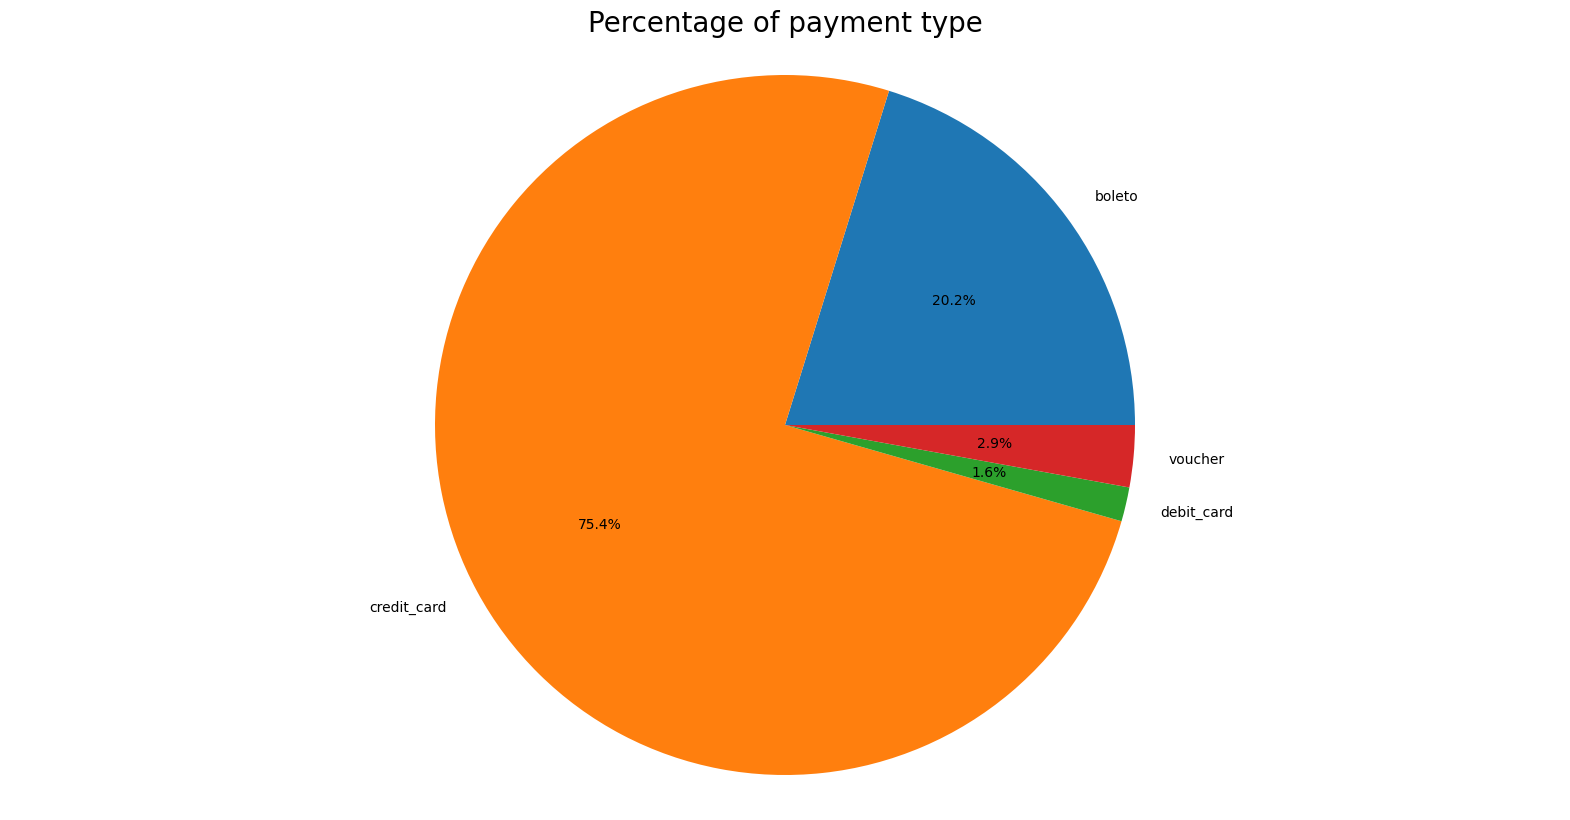

In [39]:
plt.figure(figsize=(20, 10))
my_data = Viz6['order_id']
my_labels = Viz6['payment_type']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Percentage of payment type', fontsize=20)
plt.axis('equal')
plt.show()

INSIGHT

The majority of customers use credit card as their payment type with a percentage of 75.4%, followed by boleto with 20.2%. The two other payment types, voucher and debit card was used only 2.9% and 1.6% respectively.

CUSTOMER SEGMENTATION AND CLUSTER

In [40]:
HEHEHE.head()

,order_id,customer_id,order_status,order_approved_at,payment_type,payment_value,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,credit_card,18.12,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,boleto,141.46,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,credit_card,179.12,GO
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,credit_card,72.20,RN
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,credit_card,28.62,SP
